In [60]:
import pandas as pd
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['FUEL'] = encoder.fit_transform(df['FUEL'])
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [63]:
min(list(np.array(df['FREQUENCY']))),max(list(np.array(df['FREQUENCY'])))

(1, 75)

In [64]:
def min_max_features(df):
    cols = df.columns
    min_vals,max_vals=[],[]
    for i in range(len(cols)):
        min_vals.append(min(list(np.array(df[cols[i]]))))
        max_vals.append(max(list(np.array(df[cols[i]]))))
    return min_vals,max_vals
mini,maxi = min_max_features(df)
list(zip(mini,maxi))

[(1, 7), (0, 3), (10, 190), (72, 113), (0.0, 17.0), (1, 75), (0, 1)]

In [65]:
inputs = list(zip(mini,maxi))[:-1]
inputs

[(1, 7), (0, 3), (10, 190), (72, 113), (0.0, 17.0), (1, 75)]

In [66]:
input_list=[]
for i in inputs:
    input_list.append(list(i))
input_list

[[1, 7], [0, 3], [10, 190], [72, 113], [0.0, 17.0], [1, 75]]

In [67]:
error = []
net = nl.net.newp(input_list,1)

In [68]:
net.trainf = nl.train.train_rprop

In [69]:
X = np.array(df.iloc[:,:6])
Y = np.array(df.iloc[:,6:7])


In [72]:
error.append(net.train(X,Y,show=1,epochs=100))

Epoch: 1; Error: 4341.5;
Epoch: 2; Error: 4341.5;
Epoch: 3; Error: 4341.5;
Epoch: 4; Error: 4341.5;
Epoch: 5; Error: 4341.5;
Epoch: 6; Error: 4341.5;
Epoch: 7; Error: 4341.5;
Epoch: 8; Error: 4341.5;
Epoch: 9; Error: 4341.5;
Epoch: 10; Error: 4341.5;
Epoch: 11; Error: 4341.5;
Epoch: 12; Error: 4341.5;
Epoch: 13; Error: 4341.5;
Epoch: 14; Error: 4341.5;
Epoch: 15; Error: 4341.5;
Epoch: 16; Error: 4341.5;
Epoch: 17; Error: 4341.5;
Epoch: 18; Error: 4341.5;
Epoch: 19; Error: 4341.5;
Epoch: 20; Error: 4341.5;
Epoch: 21; Error: 4341.5;
Epoch: 22; Error: 4341.5;
Epoch: 23; Error: 4341.5;
Epoch: 24; Error: 4341.5;
Epoch: 25; Error: 4341.5;
Epoch: 26; Error: 4341.5;
Epoch: 27; Error: 4341.5;
Epoch: 28; Error: 4341.5;
Epoch: 29; Error: 4341.5;
Epoch: 30; Error: 4341.5;
Epoch: 31; Error: 4341.5;
Epoch: 32; Error: 4341.5;
Epoch: 33; Error: 4341.5;
Epoch: 34; Error: 4341.5;
Epoch: 35; Error: 4341.5;
Epoch: 36; Error: 4341.5;
Epoch: 37; Error: 4341.5;
Epoch: 38; Error: 4341.5;
Epoch: 39; Error: 434

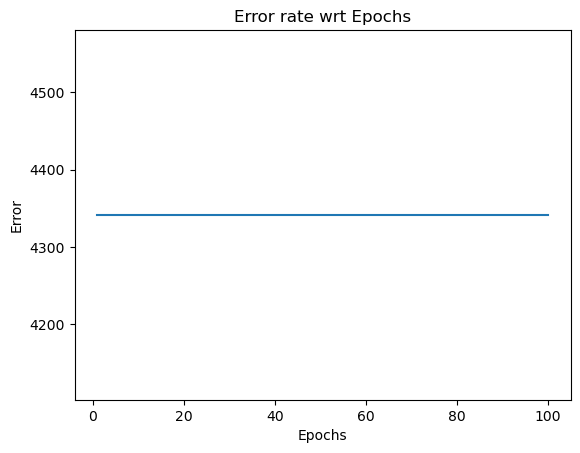

In [73]:
plt.plot(range(1,101),error[0])
plt.title('Error rate wrt Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [74]:
predicted_values = net.sim(X)     

predicted_class=predicted_values
predicted_class[predicted_values>0.5]=1
predicted_class[predicted_values<=0.5]=0

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y,predicted_class)
print(f'Accuracy : {accuracy*100:.2f} %' )

Accuracy : 50.22 %


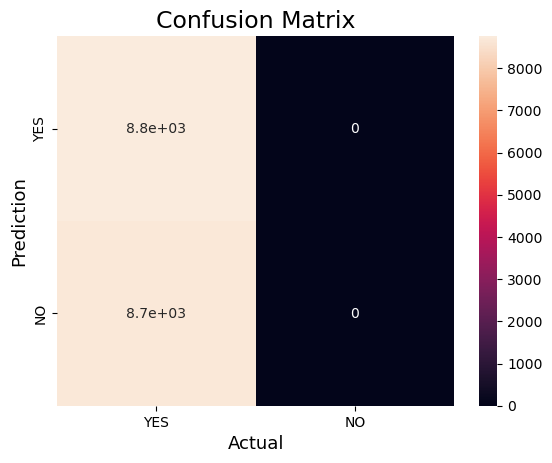

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,predicted_class)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [76]:
# Feed forward
error = []
net = nl.net.newff(input_list,[6,1])

In [77]:
net.trainf = nl.train.train_rprop


In [78]:
X = np.array(df.iloc[:,:6])
Y = np.array(df.iloc[:,6:7])



In [79]:
error.append(net.train(X,Y,show=1,epochs=100))

Epoch: 1; Error: 21339.407821447832;
Epoch: 2; Error: 4314.287717156217;
Epoch: 3; Error: 5405.120837615816;
Epoch: 4; Error: 2965.587787712996;
Epoch: 5; Error: 2233.294173804983;
Epoch: 6; Error: 2193.3837101650834;
Epoch: 7; Error: 2443.7138254992046;
Epoch: 8; Error: 1761.2792286332194;
Epoch: 9; Error: 1619.8348026344186;
Epoch: 10; Error: 2155.9955139647004;
Epoch: 11; Error: 1225.8280295481038;
Epoch: 12; Error: 1396.7860915057097;
Epoch: 13; Error: 6916.089629882678;
Epoch: 14; Error: 2506.1011598569257;
Epoch: 15; Error: 1397.9172066821689;
Epoch: 16; Error: 1203.9504739770337;
Epoch: 17; Error: 1105.9256716541884;
Epoch: 18; Error: 1172.489303387782;
Epoch: 19; Error: 1048.8072151223123;
Epoch: 20; Error: 1026.7828815891953;
Epoch: 21; Error: 971.5974351924671;
Epoch: 22; Error: 924.6131106956366;
Epoch: 23; Error: 889.3727307445873;
Epoch: 24; Error: 865.9486506801426;
Epoch: 25; Error: 849.9209774240045;
Epoch: 26; Error: 831.2280181602182;
Epoch: 27; Error: 815.08017911417

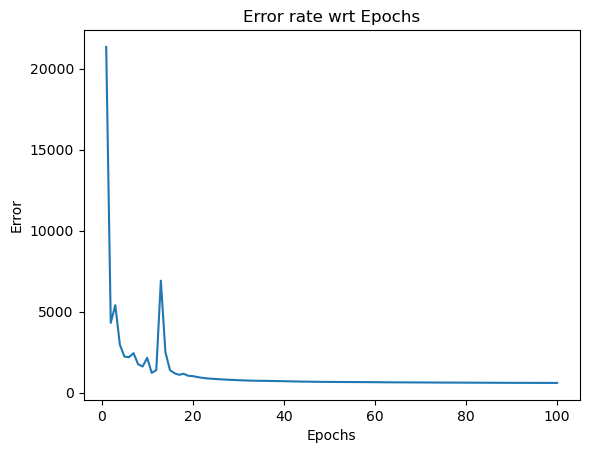

In [85]:
plt.plot(range(1,101),error[0])
plt.title('Error rate wrt Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [81]:
predicted_values = net.sim(X)     

In [82]:
predicted_class=predicted_values
predicted_class[predicted_values>0.5]=1
predicted_class[predicted_values<=0.5]=0

In [83]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y,predicted_class)
print(f'Accuracy : {accuracy*100:.2f} %' )

Accuracy : 90.52 %


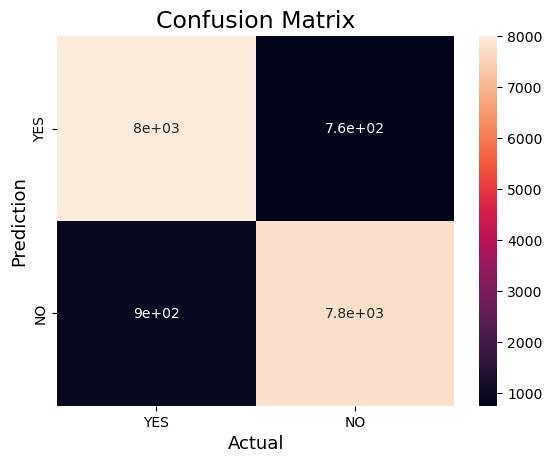

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,predicted_class)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()